<a href="https://colab.research.google.com/github/GoetheUniCV/cvproject/blob/main/Luis/covid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Grad-CAM for COVID-19

##1. Setup
###1.1 Python Environment
Almost all required packages are preinstalled, except _kerastuner_. You can install it with `!pip install -U keras-tuner`.

###1.2 Data
Upload the COVID-19 x-ray data (https://www.kaggle.com/tawsifurrahman/covid19-radiography-database) to your personal Google Drive folder:

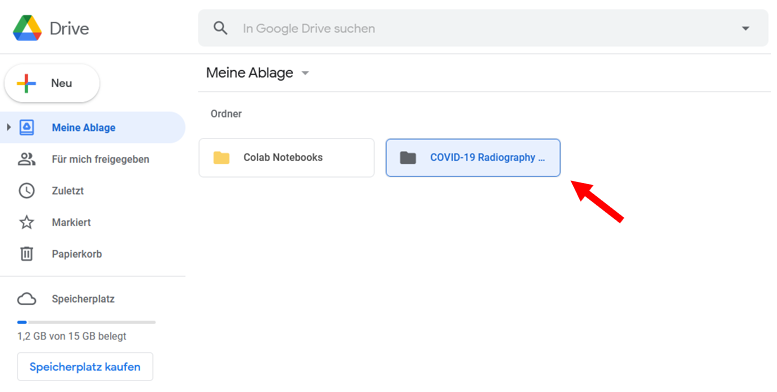
___


In [3]:
!pip install -U keras-tuner

     |████████████████████████████████| 71kB 5.6MB/s 
  Created wheel for keras-tuner: filename=keras_tuner-1.0.2-cp36-none-any.whl size=78939 sha256=c70eb44b3617c15ac3b9b636d3aa25e0a34774a8da392a9da03e748ecb1b9ca2
  Stored in directory: /root/.cache/pip/wheels/bb/a1/8a/7c3de0efb3707a1701b36ebbfdbc4e67aedf6d4943a1f463d6
  Created wheel for terminaltables: filename=terminaltables-3.1.0-cp36-none-any.whl size=15358 sha256=855beda56bf70b1555b3bcae6a898e7eb3a2917ef2a74831eda67a57432dfe31
  Stored in directory: /root/.cache/pip/wheels/30/6b/50/6c75775b681fb36cdfac7f19799888ef9d8813aff9e379663e
Successfully built keras-tuner terminaltables


In [9]:
import os

import numpy as np
import pandas as pd

import kerastuner as kt
from tensorflow import keras
import tensorflow as tf
from kerastuner.tuners import RandomSearch
from kerastuner.engine.hyperparameters import HyperParameter as hp
from keras.layers import Dense,Dropout,Activation,Add,MaxPooling2D,Conv2D,Flatten
from keras.models import Sequential 
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
from keras.applications import VGG19
from keras import layers
from keras.preprocessing import image
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import drive

In [5]:
# This mounts your Google Drive to the Colab VM.
drive.mount('/content/drive', force_remount=True)

# Foldername in your Drive where you have saved the COVID-19 data.
FOLDERNAME = 'COVID-19 Radiography Database'
assert FOLDERNAME is not None, "[!] Enter the foldername."

# now that we've mounted your Drive, this ensures that
# the Python interpreter of the Colab VM can load
# python files from within it.
import sys
sys.path.append('/content/drive/My Drive/{}'.format(FOLDERNAME))

Mounted at /content/drive


**Hint**: You can run some terminal commands in your notebook if you prefix them with `%`:

In [6]:
# Go to the directory with the COVID-19 data.
%cd drive/My\ Drive/$FOLDERNAME
# List its content.
%ls

/content/drive/My Drive/COVID-19 Radiography Database
 COVID-19/   NORMAL/  'Viral Pneumonia'/


In [10]:
# Check if data is complete.
try:
  if len(os.listdir('COVID-19')) == 1143:
    print('COVID-19 compelte.')
  else:
    print('COVID-19 incompelte.')

  if len(os.listdir('NORMAL')) == 1341:
    print('NORMAL compelte.')
  else:
    print('NORMAL incompelte.')

  if len(os.listdir('Viral Pneumonia')) == 1345:
    print('Viral Pneumonia compelte.')
  else:
    print('Viral Pneumonia incompelte.')
except FileNotFoundError:
  print("Warning: Some directories are missing!")



COVID-19 compelte.
NORMAL compelte.
Viral Pneumonia compelte.


In [11]:
train_data = defect_tree = tf.keras.preprocessing.image_dataset_from_directory(
    '.',
    labels="inferred",
    label_mode="int",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(244, 244),
    shuffle=True,
    seed=123,
    validation_split=0.2,
    subset="training",
    interpolation="bilinear",
    follow_links=False,
)
test_data = tf.keras.preprocessing.image_dataset_from_directory(
    '.',
    labels="inferred",
    label_mode="int",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(244, 244),
    shuffle=True,
    seed=123,
    validation_split=0.2,
    subset="validation",
    interpolation="bilinear",
    follow_links=False,
)

Found 3829 files belonging to 3 classes.
Using 3064 files for training.
Found 3829 files belonging to 3 classes.
Using 765 files for validation.


In [12]:
#classes 
class_names =  ["COVID-19","NORMAL","Viral Pneumonia"]
for i in range(len(class_names)):
    print(class_names[i] ," " , i)

COVID-19   0
NORMAL   1
Viral Pneumonia   2


In [13]:
# Defining the CNN.
model = tf.keras.models.Sequential([
  layers.BatchNormalization(),
  layers.Conv2D(32, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.3),
  layers.Conv2D(128, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(256, activation='relu'),
  layers.Dropout(0.15),
  layers.Dense(3, activation= 'softmax')
])

In [14]:
# Avoid overfitting...
early = tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=5)

In [15]:
# Compile the model.
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [16]:
# Fit the model.
history=model.fit(train_data,validation_data= test_data,batch_size=32,epochs = 20,callbacks=[early])

Epoch 1/20
96/96 [==============================] - 1692s 16s/step - loss: 4.2358 - accuracy: 0.6253 - val_loss: 0.5082 - val_accuracy: 0.8157
Epoch 2/20
96/96 [==============================] - 55s 536ms/step - loss: 0.2477 - accuracy: 0.9167 - val_loss: 0.2702 - val_accuracy: 0.9111
Epoch 3/20
96/96 [==============================] - 54s 533ms/step - loss: 0.1594 - accuracy: 0.9408 - val_loss: 0.2325 - val_accuracy: 0.9242
Epoch 4/20
96/96 [==============================] - 54s 533ms/step - loss: 0.1292 - accuracy: 0.9515 - val_loss: 0.1998 - val_accuracy: 0.9386
Epoch 5/20
96/96 [==============================] - 54s 532ms/step - loss: 0.0890 - accuracy: 0.9681 - val_loss: 0.3876 - val_accuracy: 0.9072
Epoch 6/20
96/96 [==============================] - 55s 537ms/step - loss: 0.0898 - accuracy: 0.9668 - val_loss: 0.2241 - val_accuracy: 0.9307
Epoch 7/20
96/96 [==============================] - 55s 538ms/step - loss: 0.0476 - accuracy: 0.9786 - val_loss: 0.1957 - val_accuracy: 0.9490

In [17]:
# Evaluate the model.
model.evaluate(test_data)

24/24 [==============================] - 10s 297ms/step - loss: 0.2487 - accuracy: 0.9477


[0.24871842563152313, 0.9477124214172363]

In [ ]:
#plotting training values
sns.set()

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

#accuracy plot
plt.plot(epochs, acc, color='green', label='Training Accuracy')
plt.plot(epochs, val_acc, color='blue', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.figure()
#loss plot
plt.plot(epochs, loss, color='pink', label='Training Loss')
plt.plot(epochs, val_loss, color='red', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [ ]:
#train data accuracy and loss
plt.plot(history.history['val_loss'], label = 'training loss')
plt.plot(history.history['val_accuracy'], label = 'training accuracy')
plt.legend()

In [ ]:
#test data accuracy and loss
plt.plot(history.history['loss'], label = 'training loss')
plt.plot(history.history['accuracy'], label = 'training accuracy')
plt.legend()

In [22]:
#save file as h5 model
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5

model.save("model.h5")